In [2]:
import networkx as nx
from diffusion_models import Weighted_Cascade, Trivalency_Model, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold
from influence_max_algorithms import MIA
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tqdm
import time as time
import pandas as pd

from nbc import non_backtracking_centrality

import pickle


In [4]:
pb2020 = nx.read_gml('/Users/davidguzman/Documents/GitHub/Network-Science-final-Maximization-/Proud_Boys_Datsets/PB2020.gml')

In [5]:
#invert edge direction for PB2020
pb2020 = pb2020.reverse()

In [6]:
#print number of nodes and edges
print('Number of nodes: ', pb2020.number_of_nodes())
print('Number of edges: ', pb2020.number_of_edges())

Number of nodes:  13217
Number of edges:  14477


In [5]:
seed_size = 30

In [7]:
ICM_model_2020 = Independent_Cascade()
ICM_model_2020.fit(pb2020)
decreasing_cascade_model_2020 = Decreasing_Cascade()
decreasing_cascade_model_2020.fit(pb2020)
weighted_cascade_model_2020 = Weighted_Cascade()
weighted_cascade_model_2020.fit(pb2020)
trivalency_model_2020 = Trivalency_Model()
trivalency_model_2020.fit(pb2020)
linear_threshold_model_2020 = linear_threshold()
linear_threshold_model_2020.fit(pb2020)
general_threshold_model_2020 = general_threshold()
general_threshold_model_2020.fit(pb2020)

In [8]:
def assing_model_probs_to_weights(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.probability[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

In [9]:
def assing_model_probs_to_weights_threshold(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.influence[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

# Diffusion models + MIA

In [10]:
pb2020_independent_cascade = assing_model_probs_to_weights(ICM_model_2020)
pb2020_weighted_cascade = assing_model_probs_to_weights(weighted_cascade_model_2020)
pb2020_decreasing_cascade = assing_model_probs_to_weights(decreasing_cascade_model_2020)
pb2020_trivalency = assing_model_probs_to_weights(trivalency_model_2020)

In [11]:
pb2020_linear_threshold = assing_model_probs_to_weights_threshold(linear_threshold_model_2020)
pb2020_general_threshold = assing_model_probs_to_weights_threshold(general_threshold_model_2020)

In [11]:
mia = MIA(pb2020_weighted_cascade)
mia_icm = MIA(pb2020_independent_cascade)
mia_decreasing = MIA(pb2020_decreasing_cascade)
mia_trivalency = MIA(pb2020_trivalency)
mia_linear_threshold = MIA(pb2020_linear_threshold)
mia_general_threshold = MIA(pb2020_general_threshold)

### calcualtion of MIA

In [12]:
start = time.time()

end = time.time()

print(end - start)

1.3113021850585938e-05


In [13]:
seed_wcm, timings_wcm = mia.MIA_fast_timed(pb2020_weighted_cascade, 20, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:42<00:00, 309.16it/s]


Initialization Completed


100%|██████████| 20/20 [04:14<00:00, 12.72s/it]


In [12]:
seed_icm, timings_icm = mia_icm.MIA_fast(pb2020_independent_cascade, 100, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:46<00:00, 282.38it/s]


Initialization Completed


100%|██████████| 100/100 [20:41<00:00, 12.41s/it]


In [13]:
seed_dc, timings_dc = mia_decreasing.MIA_fast(pb2020_decreasing_cascade, 100, 0.5)


Starting MIA intialization


100%|██████████| 13217/13217 [00:45<00:00, 292.91it/s]


Initialization Completed


100%|██████████| 100/100 [19:18<00:00, 11.58s/it]


In [14]:
seed_trivalency, timings_tr = mia_trivalency.MIA_fast(pb2020_trivalency, 100, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:44<00:00, 295.98it/s]


Initialization Completed


100%|██████████| 100/100 [18:20<00:00, 11.00s/it]


In [15]:
seed_lt, timings_lt = mia_linear_threshold.MIA_fast(pb2020_linear_threshold, 100, 0.5)


Starting MIA intialization


100%|██████████| 13217/13217 [00:42<00:00, 312.00it/s]


Initialization Completed


100%|██████████| 100/100 [18:21<00:00, 11.02s/it]


In [16]:
seed_gt, timings_gt = mia_general_threshold.MIA_fast(pb2020_general_threshold, 100, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:44<00:00, 294.25it/s]


Initialization Completed


100%|██████████| 100/100 [19:11<00:00, 11.51s/it]


In [14]:
# open pickle 
with open('mia_timings_wcm.pickle', 'rb') as handle:
    timings_wcm = pickle.load(handle)

with open('mia_timings_icm.pickle', 'rb') as handle:
    timings_icm = pickle.load(handle)

with open('mia_timings_dc.pickle', 'rb') as handle:
    timings_dc = pickle.load(handle)

with open('mia_timings_tr.pickle', 'rb') as handle:
    timings_tr = pickle.load(handle)

with open('mia_timings_lt.pickle', 'rb') as handle:
    timings_lt = pickle.load(handle)

with open('mia_timings_gt.pickle', 'rb') as handle:
    timings_gt = pickle.load(handle)

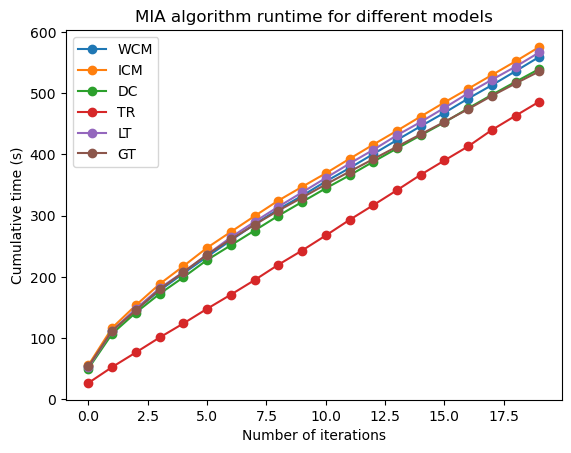

In [18]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings
cumulative_timings_wcm = np.cumsum(timings_wcm)
cumulative_timings_icm = np.cumsum(timings_icm)
cumulative_timings_dc = np.cumsum(timings_dc)
cumulative_timings_tr = np.cumsum(timings_tr)
cumulative_timings_lt = np.cumsum(timings_lt)
cumulative_timings_gt = np.cumsum(timings_gt)
#plot the cumulative timings
plt.plot(cumulative_timings_wcm, label='WCM', marker = 'o')
plt.plot(cumulative_timings_icm, label='ICM', marker = 'o')
plt.plot(cumulative_timings_dc, label='DC', marker = 'o')
plt.plot(cumulative_timings_tr, label='TR', marker = 'o')
plt.plot(cumulative_timings_lt, label='LT', marker = 'o')
plt.plot(cumulative_timings_gt, label='GT', marker = 'o')

plt.xlabel('Number of iterations')
plt.ylabel('Cumulative time (s)')
plt.title('MIA algorithm runtime for different models')
#log scale for the y axis
#plt.yscale('log')
plt.legend()
plt.show()